Recreating the table from the section total survey error from [Cornell's Rope Center](https://ropercenter.cornell.edu/polling-and-public-opinion/polling-fundamentals)

In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

95% Confidence Interval is 2.0


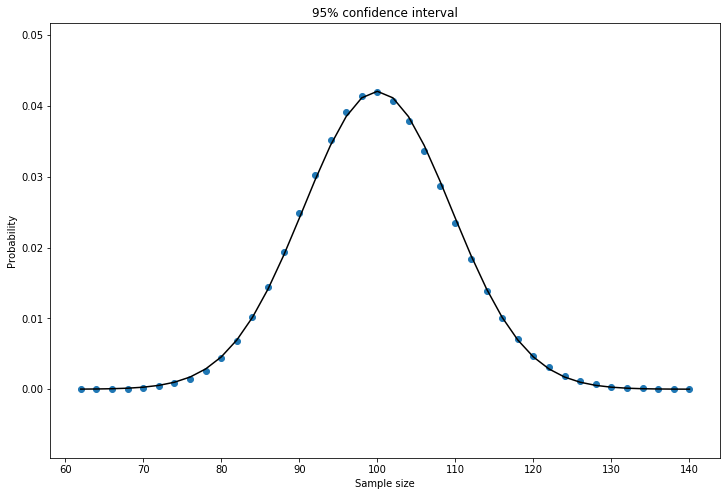

In [2]:
def normal_to_binomial(p, n):
    return n*p, np.sqrt(n*p*(1-p))
    

def confint95(p, n):
    mu, sigma = normal_to_binomial(p, n)
    z_score = 1.96
    return np.round(100*z_score*sigma/n)

p, n = 0.1, 1000 # 0.1 equiv to 10%
print("95% Confidence Interval is {}".format(confint95(p, n)))

mu, sigma = normal_to_binomial(p, n)
x = np.linspace(62,140,40)
plt.figure(figsize=(12,8))
plt.scatter(x,sts.binom.pmf(x,n,p))
plt.plot(x,sts.norm.pdf(x,mu,sigma), color = "black")
plt.title('95% confidence interval')
plt.xlabel('Sample size')
plt.ylabel('Probability')
plt.show()

In [3]:
def create_table(percentages, sample_sizes):
    n, m, percentages = len(percentages), len(sample_sizes), percentages/100
    table = [np.zeros(m) for i in range(n)]
    for i in range(n):
        for j in range(m):
            table[i][j] = confint95(percentages[i], sample_sizes[j])
    return np.array(table)

percentages = np.linspace(10, 90, 9)
sample_sizes = [1000, 750, 500, 250, 100]

create_table(percentages, sample_sizes)

array([[ 2.,  2.,  3.,  4.,  6.],
       [ 2.,  3.,  4.,  5.,  8.],
       [ 3.,  3.,  4.,  6.,  9.],
       [ 3.,  4.,  4.,  6., 10.],
       [ 3.,  4.,  4.,  6., 10.],
       [ 3.,  4.,  4.,  6., 10.],
       [ 3.,  3.,  4.,  6.,  9.],
       [ 2.,  3.,  4.,  5.,  8.],
       [ 2.,  2.,  3.,  4.,  6.]])